This notebook was created for testing PCA on different datasets to find the limitations of the PCA algorithm. 

For each test, a dataset was created consisting of two one dimensional arrays $X$ and $y$. These were the plotted. PCA was applied to find the principal components and the way these explained the data was examined. The data was transoformed along the first principle componet and then back into the orignal coordinate system to see the effect of the transform. The amound of information retained was noted.

# Creating a PCA algorithm

In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def standardise(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean)/std

In [77]:
def cov(X, y):
    """Covariance between X and y"""
    s = 0
    mu_X = sum(X)/len(X)
    mu_y = sum(y)/len(X)
    for i in range(len(X)):
        s += (X[i] - mu_X)*(y[i] - mu_y)
    return s/(len(X)-1)

In [78]:
def cov_matrix(X, y):
    """
    X: array of data (1D)
    y: array of data (1D)
    
    
    returns the principle components of the dataset.
    """
    
    c = np.zeros((2,2))
    
    data=[X, y]
    
    for i in range(2):
        for j in range(2):
            c[i, j] = cov(data[i], data[j])
    return c

In [99]:
def PC(X, y):
    """
    X: array of data (1D)
    y: array of data (1D)
    
    
    returns the principle components of the dataset.
    """
    X = standardise(X)
    y = standardise(y)
    
    c = cov_matrix(X, y)
    
    val, vec = np.linalg.eig(c)
    
    cvar = np.var(np.dot(np.array([X,y]).T, vec), axis=0)
    idx = np.argsort(-cvar)
    cvar = cvar[idx]
    vec = vec[:, idx]
    val = val[idx]
    return vec[:,0], vec[:,1]

In [100]:
def PV(X, y):
    """
    X: array of data (1D)
    y: array of data (1D)
    
    
    returns the principle components of the dataset.
    """
    X = standardise(X)
    y = standardise(y)
    
    c = cov_matrix(X, y)
    
    val, vec = np.linalg.eig(c)
    
    cvar = np.var(np.dot(np.array([X,y]).T, vec), axis=0)
    idx = np.argsort(-cvar)
    cvar = cvar[idx]
    vec = vec[:, idx]
    val = val[idx]
    return val[0], val[1]

Testing

In [111]:
X = [1, 2, 2,1,3,4,3,5,6,7]
y = [1, 3, 2,2,3,5,4,6,7,7]
pc = PC(X,y)

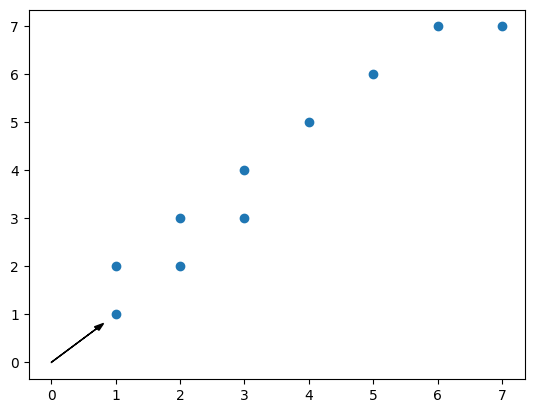

In [114]:
plt.scatter(X, y)
plt.arrow(0, 0, pc[0][0], pc[0][0], color='k', head_width=0.1)